# Importing All necessary Libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Warnings

In [45]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [46]:
df=pd.read_csv('fraud.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Shape

In [47]:
df.shape

(614, 13)

# Columns

In [48]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Datatypes

In [49]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Observations: 
    
    There are mixed datatypes. Some are Object type and some are float types and some are int types

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observations: 
    
    Numeric features

Numeric features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']

Catagorical features 

Catagorical features =['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area','Loan_Status']

# Missing Values

In [51]:
df.isnull().values.any()

True

### Missing values column wise

In [52]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Missing values via visualization

<AxesSubplot:>

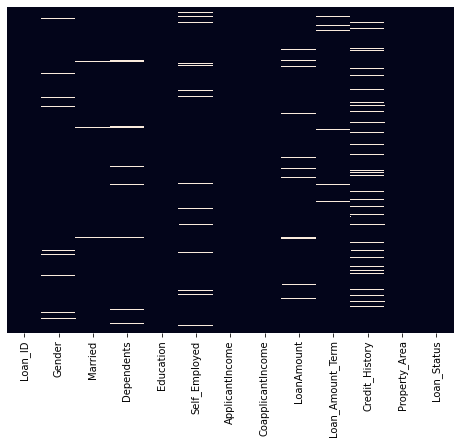

In [53]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Observations: 
    
    1. The summary shows that the variables- Gender, Married, Dependents, Self-Employed contain missing values. These variables are catagorical data type. So, I will impute the missing values with the most frequent values. i.e.mode
    
    2. Also the variable 'LoanAmount' ,'Loan_Amount_Term' ,'Credit_History' contains missing values. These variables are numeric data types. So, I will impute the missing values with mean.       

# Imputing values in catagorical columns

### Imputing the missing values with mode

In [54]:
for col in ['Gender', 'Married', 'Dependents','Self_Employed']:
    df[col].fillna(df[col].mode()[0],inplace=True)
    
#Now check the null values
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Observations: 
    
    Now all the missing values present in catagorical columns are imputed.

### Imputing the missing values with mean

In [55]:
for col in ['LoanAmount','Loan_Amount_Term' ,'Credit_History']:
    df[col].fillna(df[col].mean(),inplace=True)
    
#Now check the null values
df.isnull().sum()                                          #After mean no need to use [0]

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Observations: 
    
    Now all the missing values are imputed. We can also see this with heatmap.


<AxesSubplot:>

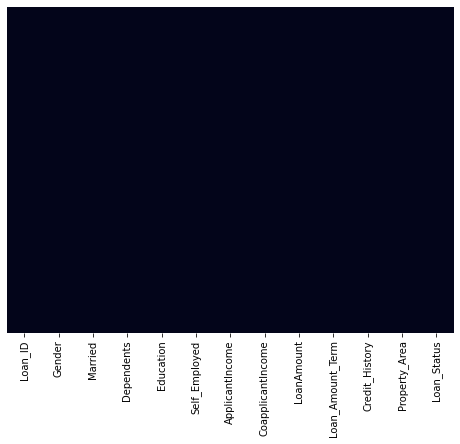

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [57]:
df.isnull().values.any()

False

# Exploratory the catagorical columns

### Printing the object data types and their unique values

In [60]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('**********************************************************************************')
        print("\n")

Loan_ID:['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289

Observations: 
    
    This is the summary of catagorical columns.
    
    1. Loan sanction to 422 people.
    
    2. Three types of properties are mentioned in our dataset i.e. Urban, Rural, and Semiurban.
    
    3. 532 people are self employed.
    
    4. Out of 614 people only 480 people are Graduated.
    
    5. Out of 614 people 401 people are married.

### For analyzing the data with target i.e. Loan_Status we have to change income into numeric type. 

In [61]:
df['Loan_Status']=df['Loan_Status'].map({'N':0,'Y':1})
df['Loan_Status'].dtypes

dtype('int64')

In [62]:
df['Loan_Status'].unique()

array([1, 0], dtype=int64)

Observations: 
    
    Here 1 stands for loan sanction and o stands for loan rejected.

# Summary Statistics

In [63]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.842199,0.687296
std,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.463973
min,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


Observations: 
    
    1. Applicant maximum income is 81000 and minimum income is 150
    
    2. Coapplicant maximum income is 41667 and minimum income is 0
    
    3. Maximum Loan ammount is 700 and minimum Loan amount is 9
    
    4. ApplicantIncome,CoapplicantIncome and LoanAmount mean is greater than median therefore data is right skewed for these attributes.
    
    5. For Loan_Amount_Term	Credit_History	Loan_Status median is greater than mean therefre data is left skewed for these attributes.
    
    6. The difference between 75% and maximum is higher in ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term columns therefore outliers are present in these columns.

# Correlation

In [64]:
df_corr=df.corr()
df_corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,-0.001665,-0.059187
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.036416
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.020974
Credit_History,-0.014477,-0.001665,-0.007738,0.001395,1.000000,0.540483
Loan_Status,-0.004710,-0.059187,-0.036416,-0.020974,0.540483,1.000000


# Heatmap

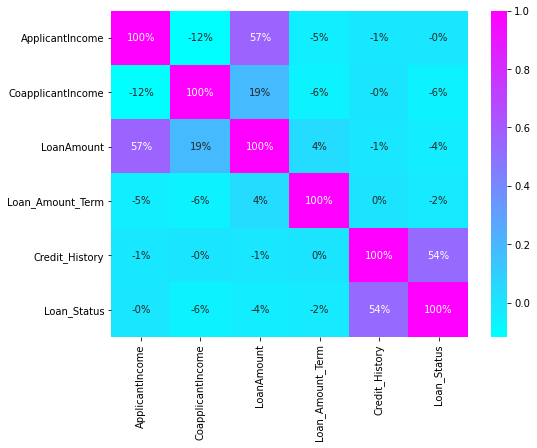

In [66]:
plt.figure(figsize=(8,6))
sns.heatmap(df_corr,annot=True,fmt='.0%',cmap='cool')
plt.show()

### correlation with target variable

Text(0.5, 1.0, 'Correlation with Target Variable')

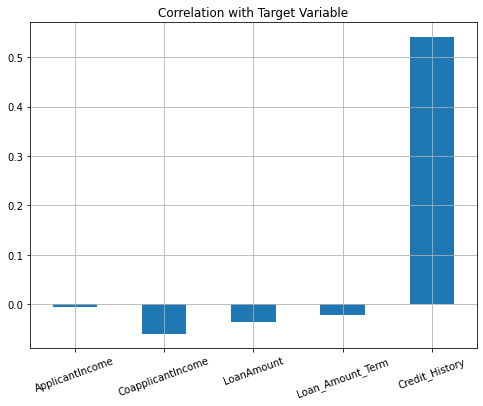

In [67]:
plt.figure(figsize=(8,6))
df.drop('Loan_Status',axis=1).corrwith(df['Loan_Status']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with Target Variable")

Observations: 
    
    1. Loan Status is highly correlated with credit_history
    
    2. Loan Amount is highly correlated with Applicant Income

# Data Visualizations

Our feature variable of interest is Loan_Status

it refers to the Loan sanction

We already change it to integer valued as it contains only two numbers 0 and 1

1 stands for Loan sanction

0 stands for Loan not pass

# Univariate Analysis

### Checking Loan sanction

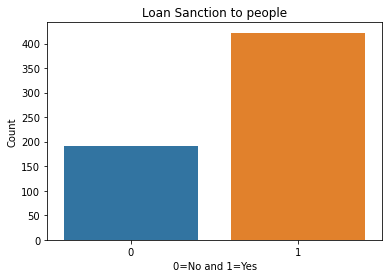

1    422
0    192
Name: Loan_Status, dtype: int64


In [71]:
plt.subplots(figsize=(6,4))
sns.countplot(x="Loan_Status",data=df)
plt.title("Loan Sanction to people")
plt.xlabel("0=No and 1=Yes")
plt.ylabel("Count")
plt.show()

print(df.Loan_Status.value_counts())

Observations : 
    
    1. 422 people will get loan
    
    2. 192 people will not get loan

### Married

### Dependents

### Education

### Self_Employed

### Property_Area

### Mean of the Loan_Amount

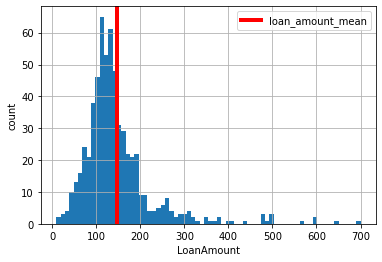

In [73]:
loan_amount=df['LoanAmount'].hist(bins=70)
mean_val=np.mean(df['LoanAmount'])
plt.axvline(mean_val,linewidth=4,color='red',label='loan_amount_mean')
plt.xlabel('LoanAmount')
plt.ylabel('count')
plt.legend()
plt.show()

### Mean of Loan_Amount_Term

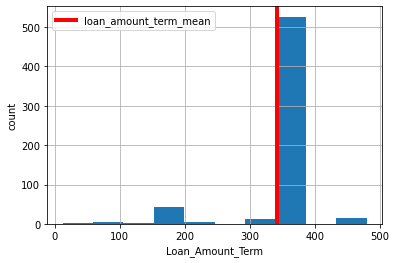

In [74]:
loan_amount=df['Loan_Amount_Term'].hist()
mean_val=np.mean(df['Loan_Amount_Term'])
plt.axvline(mean_val,linewidth=4,color='red',label='loan_amount_term_mean')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('count')
plt.legend()
plt.show()

# Bivariate Analysis

In [75]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### ApplicantIncome vs Loan_Status

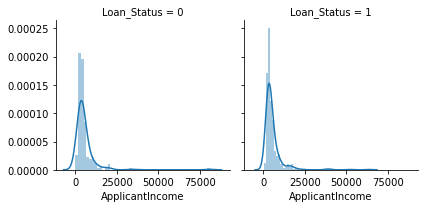

In [76]:
facet=sns.FacetGrid(df,col='Loan_Status')
facet.map(sns.distplot,"ApplicantIncome")
plt.show()

### Gender vs Loan_Status

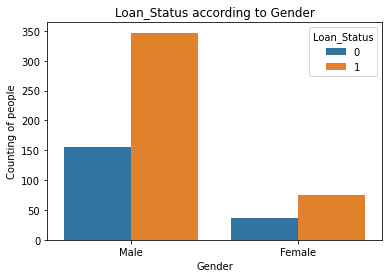

Gender  Loan_Status
Female  1               75
        0               37
Male    1              347
        0              155
Name: Loan_Status, dtype: int64


In [79]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)
plt.title("Loan_Status according to Gender")
plt.xlabel("Gender")
plt.ylabel("Counting of people")
plt.show()

print(df.groupby('Gender')['Loan_Status'].value_counts())

Observations : 
    
    1. 75 Female get loan
    
    2. 347 Male get loan

### Education vs Loan_Status

### Marital status vs Loan_Status

### Dependent vs Loan_Status

### Employment vs Loan_Status

### Property vs Loan_Status

### Applicat Income and Loan ammount ( Because they are highly correlated. We will use scatter because both of the columns are numeric)

<Figure size 576x288 with 0 Axes>

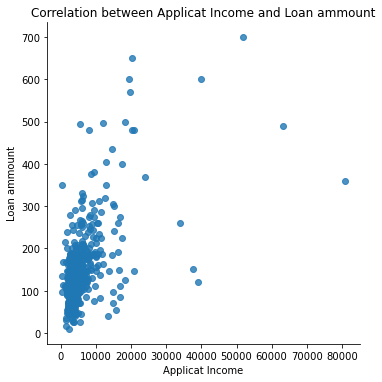

In [81]:
plt.figure(figsize=(8,4))
sns.lmplot(x='ApplicantIncome',y='LoanAmount',fit_reg=False,data=df)
plt.xlabel("Applicat Income")
plt.title("Correlation between Applicat Income and Loan ammount")
plt.ylabel("Loan ammount")
plt.show()

Observations: 
    
    Here, Aplicant Income is less therefore Loan Amount is less. Aplicant Income is high therefore Loan Amount is high. when Aplicant Income is 80,000 therefore Loan Amount is not too high.So, there are outliers.

# Skewness

### Check the distribution of Skewness

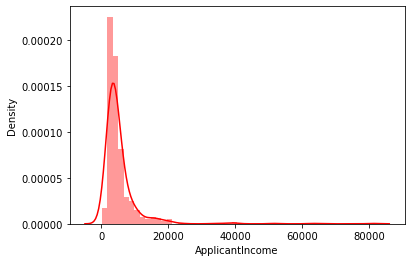

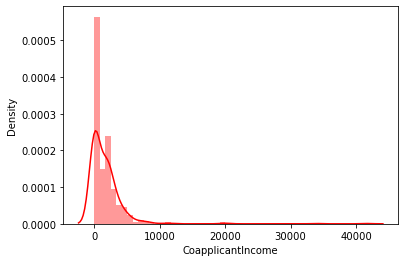

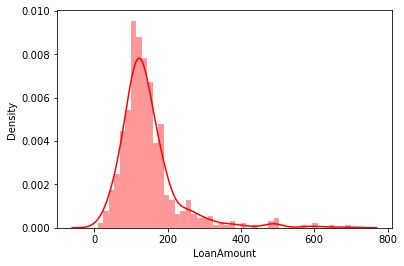

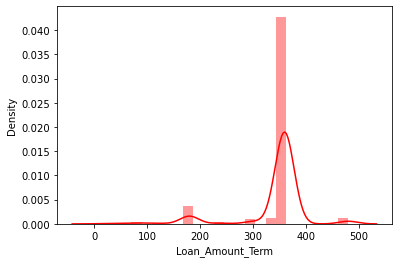

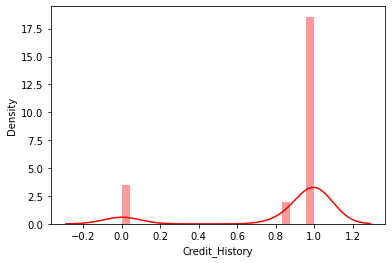

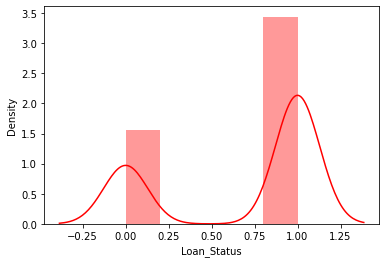

In [84]:
for col in df.describe().columns:           #We have used df.describe() because we want the skewness only for numeric
    sns.distplot(df[col],color='r')
    plt.show()

# Outliers and Skewness are very much dedicated for numeric type

In [85]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Loan_Status         -0.809998
dtype: float64

### Treating Skewness via root method and cube root method

### square root method

In [87]:
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [88]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.745213,0.000000,3.478518,7.113787,1.0,Urban,1.0
1,LP001003,Male,Yes,1,Graduate,No,8.227871,6.231611,3.363586,7.113787,1.0,Rural,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,7.400828,0.000000,2.850270,7.113787,1.0,Urban,1.0
3,LP001006,Male,Yes,0,Not Graduate,No,7.129041,6.968446,3.309751,7.113787,1.0,Urban,1.0
4,LP001008,Male,No,0,Graduate,No,8.801117,0.000000,3.445917,7.113787,1.0,Urban,1.0


# Changing the catagorical data into numeric variables¶

In [89]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])    

In [90]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,8.745213,0.000000,3.478518,7.113787,1.0,2,1.0
1,1,1,1,1,0,0,8.227871,6.231611,3.363586,7.113787,1.0,0,0.0
2,2,1,1,0,0,1,7.400828,0.000000,2.850270,7.113787,1.0,2,1.0
3,3,1,1,0,1,0,7.129041,6.968446,3.309751,7.113787,1.0,2,1.0
4,4,1,0,0,0,0,8.801117,0.000000,3.445917,7.113787,1.0,2,1.0


# Plotting Outliers

<AxesSubplot:>

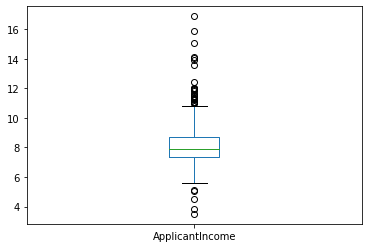

In [92]:
df['ApplicantIncome'].plot.box()     

<AxesSubplot:>

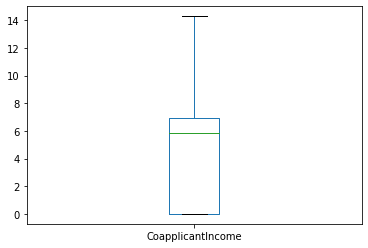

In [93]:
df['CoapplicantIncome'].plot.box()

# Removing Outliers

### z-score

In [94]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.42646802, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.42646802, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.42646802, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.42646802, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.42646802, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.42650477, 0.04760721,
        1.48253724]])

In [95]:
threshold=3
print(np.where(z>3))

(array([ 14,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 183,
       185, 216, 242, 262, 308, 313, 333, 333, 369, 409, 443, 468, 487,
       495, 497, 506, 523, 546, 561, 568, 575, 585, 604], dtype=int64), array([8, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 8, 6, 6, 6, 9, 9, 8, 9, 6, 8, 8,
       6, 6, 6, 8, 9, 9, 8, 8, 9, 8, 8, 9, 9, 8], dtype=int64))


In [96]:
new_df=df[(z<3).all(axis=1)]

In [98]:
df=new_df
df.shape

(582, 13)

### All outliers are removed

# Model Training

In [99]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,8.745213,0.000000,3.478518,7.113787,1.0,2,1.0
1,1,1,1,1,0,0,8.227871,6.231611,3.363586,7.113787,1.0,0,0.0
2,2,1,1,0,0,1,7.400828,0.000000,2.850270,7.113787,1.0,2,1.0
3,3,1,1,0,1,0,7.129041,6.968446,3.309751,7.113787,1.0,2,1.0
4,4,1,0,0,0,0,8.801117,0.000000,3.445917,7.113787,1.0,2,1.0


# Spilitting the data into input and output variable

In [100]:
x=df.drop(columns=['Loan_Status'],axis=1)
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,8.745213,0.000000,3.478518,7.113787,1.0,2
1,1,1,1,1,0,0,8.227871,6.231611,3.363586,7.113787,1.0,0
2,2,1,1,0,0,1,7.400828,0.000000,2.850270,7.113787,1.0,2
3,3,1,1,0,1,0,7.129041,6.968446,3.309751,7.113787,1.0,2
4,4,1,0,0,0,0,8.801117,0.000000,3.445917,7.113787,1.0,2


In [101]:
y=df['Loan_Status']
y.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Loan_Status, dtype: float64

# Checking the shape of the input and output variable

In [102]:
print(x.shape,'\t\t', y.shape)

(582, 12) 		 (582,)


# Scaling in input variables

In [103]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

### spliting the data into training and testing data

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42,stratify=y)

### Checking the shape

In [105]:
print(x_train.shape,'\t\t',x_test.shape)

(465, 12) 		 (117, 12)


In [106]:
print(y_train.shape,'\t\t',y_test.shape)

(465,) 		 (117,)


# Importing all the model Library

In [110]:
# Libraries for data modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Importinf boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

### Using GridSearchCV to find the best parameter in KNeighborsClassifier

In [112]:
parameters={'n_neighbors':range(22,25)}
knn=KNeighborsClassifier()

clf=GridSearchCV(knn,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 24}


# Model with its best parameters

In [113]:
LR=LogisticRegression(random_state=42)
KNN=KNeighborsClassifier(n_neighbors=22)
SVC=SVC()

# All algorithm by using loop

In [115]:
model=[LR,GaussianNB(),SVC,DecisionTreeClassifier(),KNN,RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is : ')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*******************************************************************')
    print('\n')

Accuracy score of LogisticRegression(random_state=42) is : 
0.8376068376068376
[[19 17]
 [ 2 79]]
              precision    recall  f1-score   support

         0.0       0.90      0.53      0.67        36
         1.0       0.82      0.98      0.89        81

    accuracy                           0.84       117
   macro avg       0.86      0.75      0.78       117
weighted avg       0.85      0.84      0.82       117

*******************************************************************


Accuracy score of GaussianNB() is : 
0.8376068376068376
[[19 17]
 [ 2 79]]
              precision    recall  f1-score   support

         0.0       0.90      0.53      0.67        36
         1.0       0.82      0.98      0.89        81

    accuracy                           0.84       117
   macro avg       0.86      0.75      0.78       117
weighted avg       0.85      0.84      0.82       117

*******************************************************************


Accuracy score of SVC() is : 
0.8

# Finding the best Parameters

### Using GridSearchCV to find the best parameter in LogisticRegression

In [116]:
parameters={'C':[1,10],'random_state':range(42,100)}
lg=LogisticRegression()

clf=GridSearchCV(lg,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'random_state': 42}


### LogisticRegression with best parameter

In [118]:
lr=LogisticRegression(C=1, random_state=42)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy score of',lr,'is : ')
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score of LogisticRegression(C=1, random_state=42) is : 
0.8376068376068376
[[19 17]
 [ 2 79]]
              precision    recall  f1-score   support

         0.0       0.90      0.53      0.67        36
         1.0       0.82      0.98      0.89        81

    accuracy                           0.84       117
   macro avg       0.86      0.75      0.78       117
weighted avg       0.85      0.84      0.82       117



### Cross validate the Logistic Regression

In [119]:
score=cross_val_score(lr,x,y,cv=10,scoring='accuracy')
print("model:",lr)
print("Score:",score)
print("Mean score:",score.mean())
print("Standard deviation:",score.std())

model: LogisticRegression(C=1, random_state=42)
Score: [0.81355932 0.79661017 0.81034483 0.77586207 0.77586207 0.79310345
 0.87931034 0.84482759 0.81034483 0.86206897]
Mean score: 0.8161893629456459
Standard deviation: 0.03339680219981519


# Using GridSearchCV to find the best parameter in SVM

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters={'kernel':['linear','rbf','poly','sigmoid'],'C':[1,10],'random_state':range(42,60)}
sv=svm.SVC()

clf=GridSearchCV(sv,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 1, 'kernel': 'rbf', 'random_state': 42}


### SVM with parameters

In [133]:
sv=svm.SVC(kernel='rbf',C=1, random_state=42,probability=True)
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
predsv=sv.predict(x_test)
print(accuracy_score(y_test,predsv))
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

0.8376068376068376
[[19 17]
 [ 2 79]]
              precision    recall  f1-score   support

         0.0       0.90      0.53      0.67        36
         1.0       0.82      0.98      0.89        81

    accuracy                           0.84       117
   macro avg       0.86      0.75      0.78       117
weighted avg       0.85      0.84      0.82       117



### Cross validate SVC

In [134]:
score=cross_val_score(sv,x,y,cv=10,scoring='accuracy')
print("model:",sv)
print("Score:",score)
print("Mean score:",score.mean())
print("Standard deviation:",score.std())

model: SVC(C=1, probability=True, random_state=42)
Score: [0.79661017 0.79661017 0.81034483 0.77586207 0.77586207 0.79310345
 0.87931034 0.84482759 0.81034483 0.86206897]
Mean score: 0.8144944476914086
Standard deviation: 0.033913366532477646


### GaussianNB

In [135]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8376068376068376
[[19 17]
 [ 2 79]]
              precision    recall  f1-score   support

         0.0       0.90      0.53      0.67        36
         1.0       0.82      0.98      0.89        81

    accuracy                           0.84       117
   macro avg       0.86      0.75      0.78       117
weighted avg       0.85      0.84      0.82       117



### Among all three models GaussianNB gives highest score so we adopt Gaussian NB as our Final Model

### Plotting Confusion matrix for GaussianNB

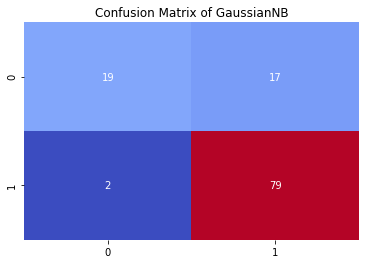

In [136]:
cm=confusion_matrix(y_test,predgnb)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title("Confusion Matrix of GaussianNB")
plt.show()

### Auc_Roc Curve and finding auc score

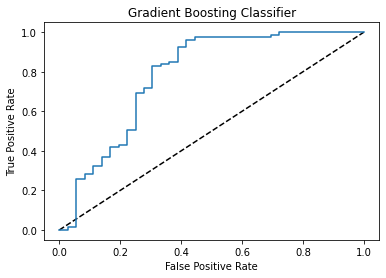

0.7515432098765432


In [137]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Classifier')
plt.show()

auc_score=roc_auc_score(y_test,predgnb)
print(auc_score)

# Saving the model

In [138]:
import joblib

# Save the model as a pickle in a file

In [130]:
joblib.dump(gnb,'Loan.pkl')

['Loan.pkl']